In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv(r"data_banknote_authentication_ml.csv")
df.head()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [6]:
df.shape

(1372, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Variance_Wavelet  1372 non-null   float64
 1   Skewness_Wavelet  1372 non-null   float64
 2   Curtosis_Wavelet  1372 non-null   float64
 3   Image_Entropy     1372 non-null   float64
 4   Class             1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [8]:
df.describe()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


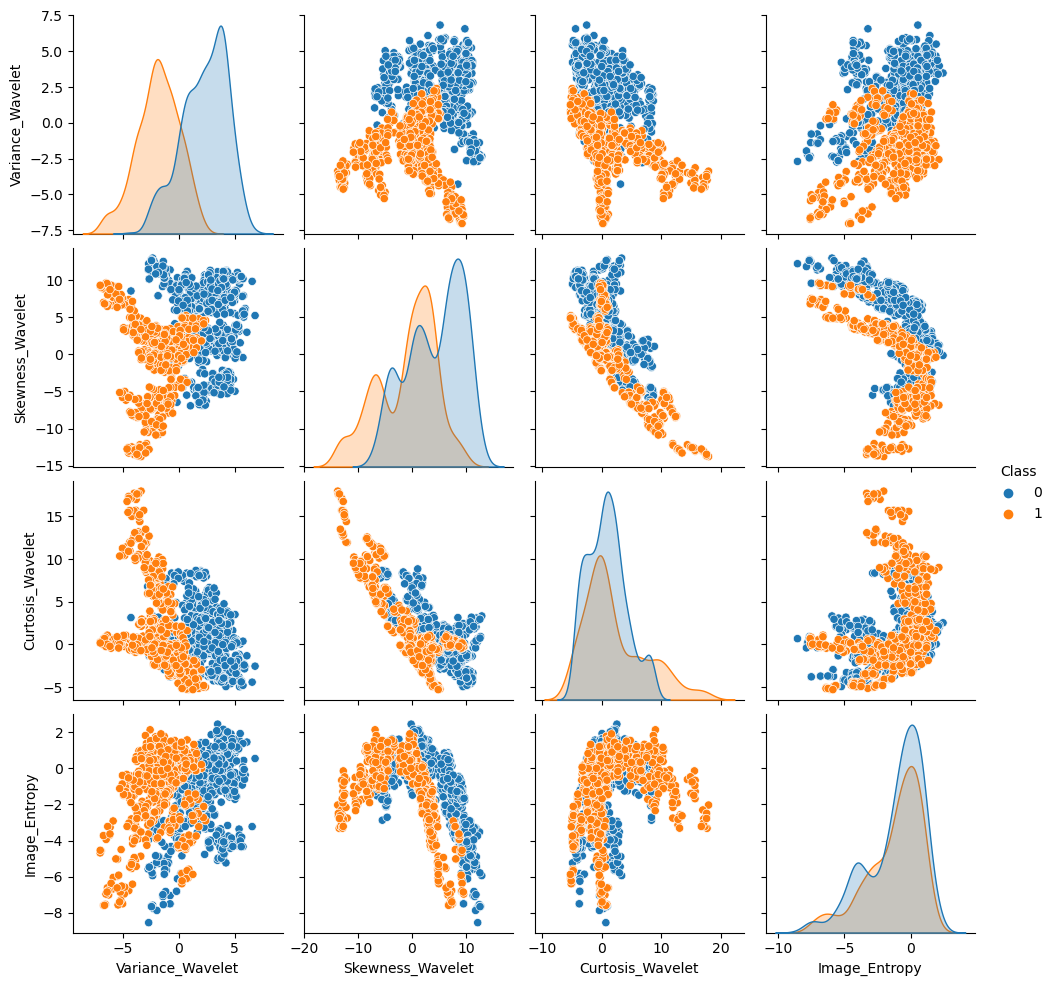

In [9]:
sns.pairplot(df,hue = 'Class')

In [10]:
X = df.drop('Class',axis=1)
y = df['Class']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.15, random_state=50)

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
n_estimators = [64,100,128,200]
max_features = [2,3,4]
bootstrap = [True,False]
oob_score = [True,False]

In [15]:
param_grid = {'n_estimators':n_estimators, 
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score }

In [16]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc,param_grid)

In [17]:
grid.fit(X_train,y_train)

c:\Users\kaps1\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\kaps1\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\kaps1\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\kaps1\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 417, in fit
    raise ValueError

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [18]:
grid.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 64, 'oob_score': False}

In [19]:
pred_rfc = grid.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [21]:
print(classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       114
           1       0.99      0.99      0.99        92

    accuracy                           0.99       206
   macro avg       0.99      0.99      0.99       206
weighted avg       0.99      0.99      0.99       206



In [22]:
confusion_matrix(y_test,pred_rfc)

array([[113,   1],
       [  1,  91]], dtype=int64)

In [36]:
grid.best_estimator_.oob_score

False

In [37]:
grid.best_estimator_.oob_score_

AttributeError: 'RandomForestClassifier' object has no attribute 'oob_score_'

#### Note: If grid search got you 'oob_score': True, you'll have some value from above cell instead of error

## If you get 'bootstrap': True and 'oob_score': False as a result of grid search, follow below steps. Basically, you'll have to fit your model again putting the parameters gridsearch gave with oob_score being set to 'True' as the only change

rfc_banknote = RandomForestClassifier(n_estimators=64, max_features=2,random_state=50, bootstrap = True, oob_score = True)

rfc_banknote.fit(X_train,Y_train)

y_pred1 = rfc_banknote.predict(X_test)

print(classification_report(y_test,pred_rfc))

rfc_banknote.oob_score_

# Finding Number of Estimators (Trees)

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
test_error = []
misclassification = []

for n in range(1,101):
    rfc1 = RandomForestClassifier(n_estimators=n,max_features=2,bootstrap=True)
    rfc1.fit(X_train,y_train)
    rfc1_pred = rfc1.predict(X_test)
    n_missed = np.sum(rfc1_pred != y_test)
    test_error.append(1-accuracy_score(rfc1_pred,y_test))
    misclassification.append(n_missed)

Text(0.5, 1.0, 'Error vs No of Trees')

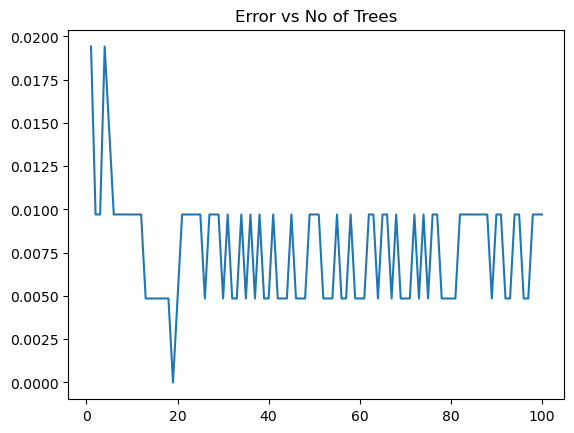

In [40]:
plt.plot(range(1,101),test_error)
plt.title('Error vs No of Trees')

Text(0.5, 1.0, 'Misclassifications vs No of Trees')

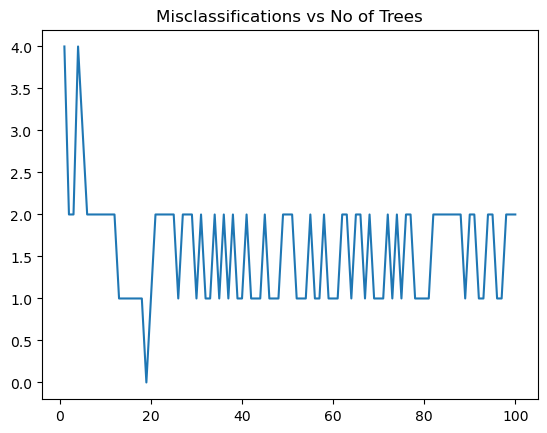

In [41]:
plt.plot(range(1,101),misclassification)
plt.title('Misclassifications vs No of Trees')